Q1.1 create myknn_regressor

In [115]:
import pickle
import numpy as np

class myknn_regressor():
    def __init__(self, k, meth):
        self.k = k
        if k >= 10 and meth == "remove_outliers":
            self.method = "remove_outliers"
        else:
            self.method = "equal_weight"
        
    def fit(self, x_train, y_train):
        self.x_train = x_train
        self.y_train = y_train

    def predict(self, x_test):
        def disCal(x_test):
            ED = np.sqrt(np.sum(np.square(x_test-self.x_train), axis = 1))
            idx = np.argsort(ED)
            y = np.array([y_train[i] for i in idx[:self.k]])

            if self.method == "equal_weight":
                return(np.mean(y))
            else:
                Q1 = np.percentile(y,25)
                Q3 = np.percentile(y,75)
                IQR = Q3 - Q1
                ub = Q3 + 1.5 * IQR
                lb = Q1 - 1.5 * IQR
                
                outlier = []
                for i in range(len(y)):
                    if y[i] > ub or y[i] < lb:
                        outlier.append(i)
                y = np.delete(y, outlier)
                
                return(np.mean(y))
        
        y_pred = np.apply_along_axis(disCal, 1, x_test)
        
        return(y_pred)

先load pickle檔然後標準化資料

In [116]:
file = open('msd_data1.pickle', 'rb')
data = pickle.load(file)

x_train = data['X_train']
x_test = data['X_test']
y_train = data['Y_train']
y_test = data['Y_test']

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train = (x_train - mean) / std
x_test = (x_test - mean) / std

file.close()

Q1.2

In [117]:
myknn = myknn_regressor(20, "equal_weight")
myknn.fit(x_train, y_train)
ypred = myknn.predict(x_test)

rmse = np.sqrt((np.square(y_test - ypred)).mean(axis=0))
print("RMSE = ", rmse)
print("the first 20 predictions : ", ypred[:20])

RMSE =  10.25126451549596
the first 20 predictions :  [1993.35 1993.8  2000.65 1991.5  1992.8  1998.5  1988.1  1991.65 2002.25
 2003.   2000.5  1998.65 1995.55 1997.2  1995.05 1997.4  1992.15 2000.45
 2003.2  1995.75]


Q1.3

In [118]:
myknn = myknn_regressor(20, "remove_outliers")
myknn.fit(x_train, y_train)
ypred = myknn.predict(x_test)

rmse = np.sqrt((np.square(y_test - ypred)).mean(axis=0))
print("RMSE = ", rmse)
print("the first 20 predictions : ", ypred[:20])

RMSE =  10.212572466080376
the first 20 predictions :  [1993.35       1993.8        2000.65       1992.73684211 1992.8
 2000.         1988.1        1991.65       2002.25       2003.94736842
 2000.5        2000.94444444 1995.55       1997.2        1998.61111111
 1997.4        1992.15       2003.83333333 2003.2        1995.75      ]


Q2

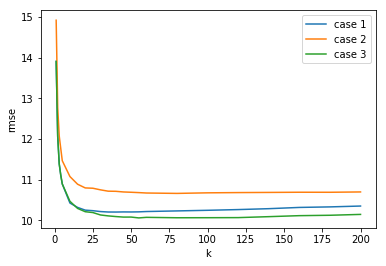

In [119]:
file = open('msd_data1.pickle', 'rb')
data = pickle.load(file)

x_train = data['X_train']
x_test = data['X_test']
y_train = data['Y_train']
y_test = data['Y_test']

mean = np.mean(x_train, axis=0)
std = np.std(x_train, axis=0)
x_train_s = (x_train - mean) / std
x_test_s = (x_test - mean) / std

file.close()


from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

knn = [1,2,3,4,5,10,15,20,25,30,35,40,45,50,55,60,80,100,120,140,160,180,200]

def rmseCal(k, xr, yr, xt, yt):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(xr, yr)
    ypred = knn.predict(xt)
    rmse = np.sqrt((np.square(yt - ypred)).mean(axis=0))
    return rmse

def myRmseCal(k, xr, yr, xt, yt):
    myknn = myknn_regressor(k, "remove_outliers")
    myknn.fit(xr, yr)
    ypred = myknn.predict(xt)
    rmse = np.sqrt((np.square(yt - ypred)).mean(axis=0))
    return rmse

rmse_sk = [rmseCal(k, x_train, y_train, x_test, y_test) for k in knn]
rmse_sk_s = [rmseCal(k, x_train_s, y_train, x_test_s, y_test) for k in knn]
rmse_myknn = [myRmseCal(k, x_train_s, y_train, x_test_s, y_test) for k in knn]

# case 1: using KNeighborsRegressor. All feature values are standardized.
# case 2: using KNeighborsRegressor. No feature scaling.
# case 3: using myknn_regressor. All feature values are standardized.

plt.plot(knn, rmse_sk_s, label = "case 1")
plt.plot(knn, rmse_sk, label = "case 2")
plt.plot(knn, rmse_myknn, label = "case 3")
plt.legend(loc='upper right')
plt.xlabel("k")
plt.ylabel("rmse")
plt.show()

observations:

1. 三個case的線圖走勢相似，當k越大，rmse越小。
2. 其中case 2（橘線）（using KNeighborsRegressor. No feature scaling.）誤差最大，因為資料沒有標準化，可見標準化後train有助於降低誤差。
3. 同樣是有做資料標準化的case1, 3，因為case 3有去除outlier，所以誤差較小